# **Bayes Naive Classifier on the Iris Dataset**
Lecture 2: 26/9/2025


In this notebook, we introduce the IRIS dataset and use it as a benchmark for the Bayes Naive Classifier. Python is great for playing around with ML as it is simple, well documented, and nearly everything is already implemented! In particular, we are using the [scikit-learn](https://scikit-learn.org/stable/) library.  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## **Exploratory Analysis**

IRIS is one of the most well knwon dataset for classification tasks. Initially introduced in *1936*, it is so well known that has a [wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set) and is contained in scikit-learn!  

To handle the dataset, we use the [pandas](https://pandas.pydata.org/) library, which is the Python standard way of handling datasets for ML.

In [3]:
iris = load_iris()

# Convert to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Exploring the dataset, we see that it contains 150 data points (not so many, but good for now), each point corresponds to a flower. Each flower has four feature (length and width of the petal and the sepal), and belongs to one of three species: setosa, virginica and versicolor.


In [11]:
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSummary statistics:")
print(df.describe())

print("\nClass distribution:")
print(df['species'].value_counts())

Dataset shape: (150, 5)

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Class distribution:
species
se


Beyond numerical summaries, it is useful to visualize the distribution of the features.

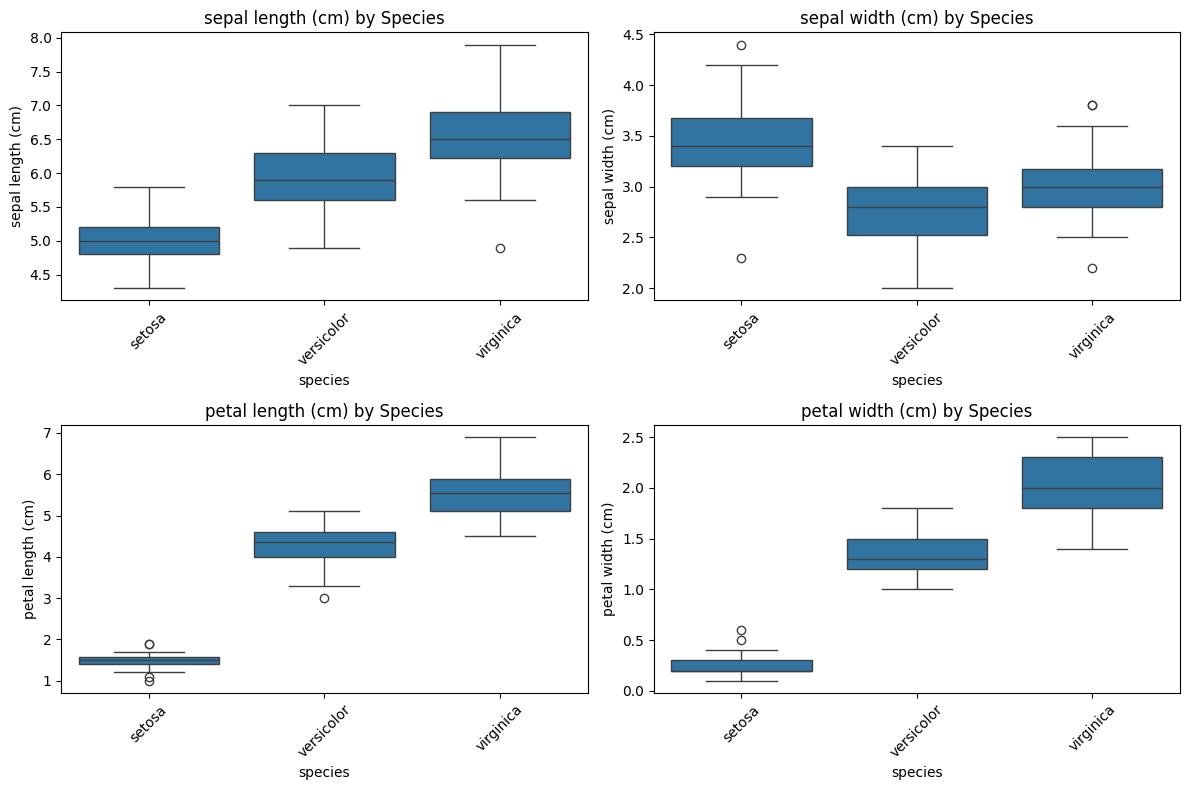

In [9]:
features = iris.feature_names
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


... and the inter-feature interaction!

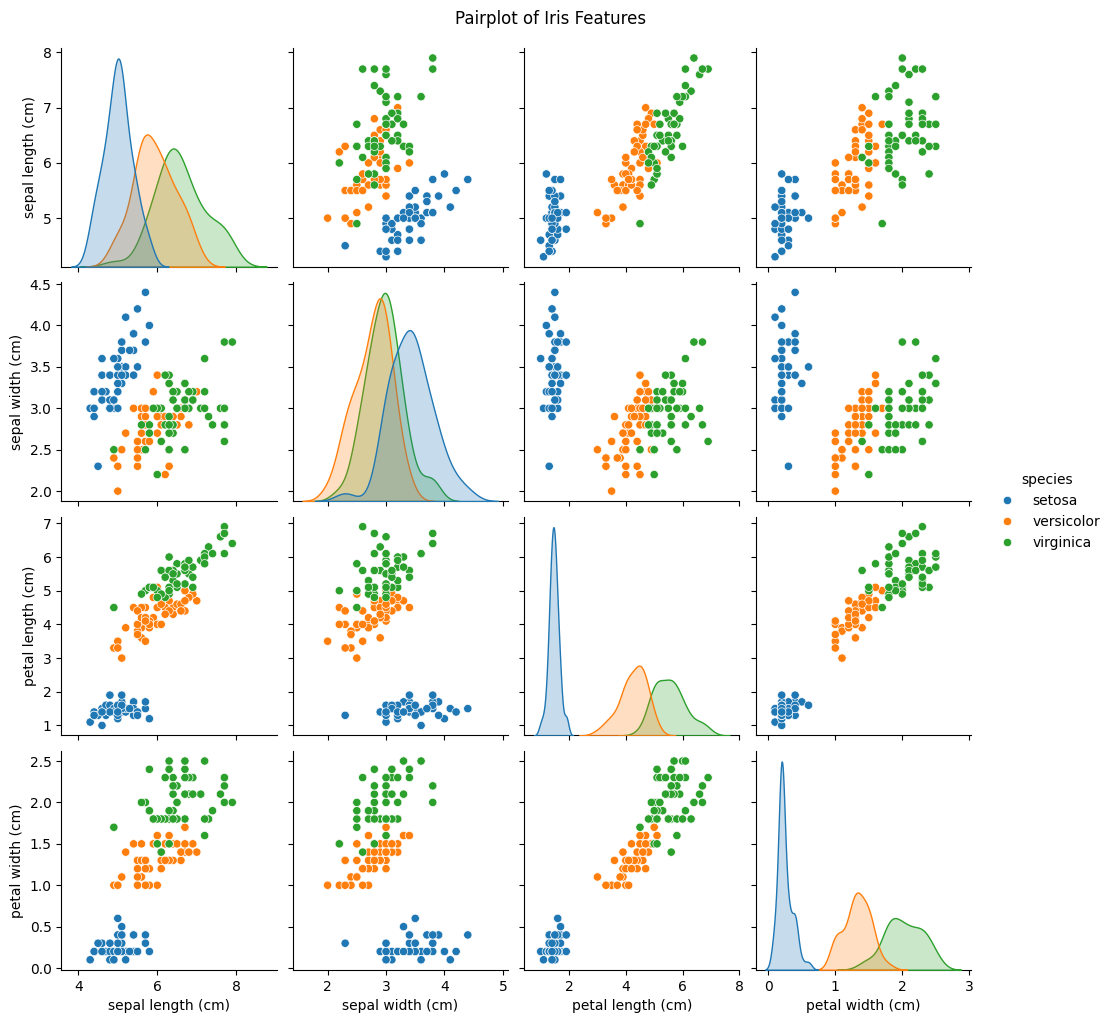

In [12]:
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

## **Classification via Naive Bayes**

We now start to construct our ML pipeline. As a first step, we divide the dataset into training (used to *fit* the model, i.e., to find good parameters of the model) and test set (used to *evaluate* our classifier)

In [13]:
#Split test and train

X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

We use the Gaussian Naive Bayes model: we **assume** that for each one of the three species, each one of the four features behaves as a one-dimensional *independent* gaussian distribution.

**Note**: this means that the fitting procedure consists in estimating 24 numbers: for each label, we have four gaussians, each characterized by mean $\mu$ and variance $\sigma^2$

In [14]:
#Train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      0.95      0.97        40
  versicolor       0.89      0.89      0.89        37
   virginica       0.91      0.95      0.93        43

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



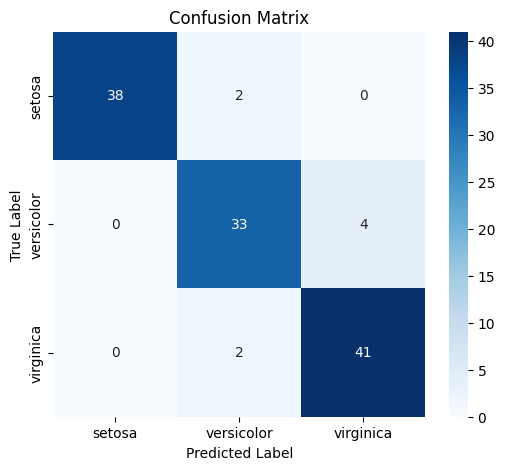

In [15]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Open question:** Try to explain in words the results of this experiment. Are they good, bad, expected?